# Import the necessary packages

In [61]:
import kaggle
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import random 
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import datetime
from sklearn.metrics import classification_report


# Obtain Input Data

In [45]:
#Call Kaggle API
#api = KaggleApi()
#api.authenticate()

In [46]:
#handle = zipfile.ZipFile(r'C:\Users\Aaron\.kaggle\dogs-vs-cats.zip','r')
#handle.extractall(r'C:\Users\Aaron\.kaggle')
#handle.close()

In [12]:
#handle = zipfile.ZipFile(r'C:\Users\Aaron\.kaggle\train.zip','r')
#handle.extractall(r'C:\Users\Aaron\.kaggle')
#handle.close()

In [47]:
DIRECTORY = r'C:\Users\Aaron\.kaggle\train'
CATEGORIES = ['cat','dog']

data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])

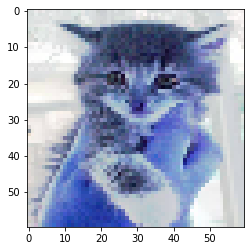

In [48]:
plt.imshow(data[3][0],cmap=plt.cm.binary) #Do weird negative images impact model
plt.show()
#Negative kitty?

In [49]:
# Add to github using github repo shtuff

# Model Training Prep

In [50]:
#Mix the data up, between cats and dog

random.shuffle(data) ##lookup

X = []
y = []


for features, label in data:
    X.append(features)
    y.append(label)
    

X = np.array(X)
y = np.array(y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.45,random_state = 2) 

In [54]:
# What does image look like in array
X_train[0]

array([[[255, 255, 226],
        [255, 255, 226],
        [255, 255, 226],
        ...,
        [254, 251, 220],
        [251, 246, 222],
        [254, 254, 229]],

       [[253, 255, 230],
        [253, 255, 230],
        [250, 253, 227],
        ...,
        [246, 239, 223],
        [246, 245, 227],
        [250, 249, 239]],

       [[249, 251, 235],
        [252, 255, 232],
        [251, 255, 225],
        ...,
        [132, 143, 147],
        [ 94, 121, 131],
        [101, 120, 131]],

       ...,

       [[ 13,  32,  13],
        [ 21,  30,  14],
        [ 18,  29,  12],
        ...,
        [  7,  23,  12],
        [ 10,  21,   9],
        [  4,  15,   4]],

       [[  1,  14,   0],
        [ 18,  34,  11],
        [ 22,  38,  16],
        ...,
        [  8,  23,  13],
        [ 15,  23,  13],
        [ 16,  24,  13]],

       [[ 11,  22,  14],
        [ 15,  29,  11],
        [ 22,  35,  19],
        ...,
        [  4,  20,  10],
        [ 17,  25,  15],
        [ 24,  32,  21]]

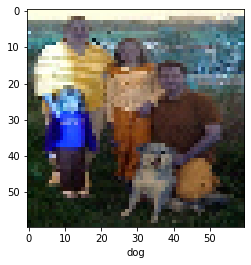

In [55]:
#What does Image look like?
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.xlabel(CATEGORIES[y_train[0]])
plt.show()


In [56]:
# Normalizing Data
X_train = X_train/255
X_test = X_test/255

# ANN and CNN Model Training & Review

In [59]:
#Test on ANN first
begin_time = datetime.datetime.now()

modelANN = models.Sequential([
    layers.Flatten(input_shape =(60,60,3)),
    layers.Dense(100,activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])

modelANN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelANN.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
430/430 [==============================] - 4s 8ms/step - loss: 0.7696 - accuracy: 0.5448
Epoch 2/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6792 - accuracy: 0.5765
Epoch 3/10
430/430 [==============================] - 3s 8ms/step - loss: 0.6682 - accuracy: 0.5913
Epoch 4/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6644 - accuracy: 0.5954
Epoch 5/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6601 - accuracy: 0.6066
Epoch 6/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6469 - accuracy: 0.6204
Epoch 7/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6408 - accuracy: 0.6303
Epoch 8/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6513 - accuracy: 0.6147
Epoch 9/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6407 - accuracy: 0.6295
Epoch 10/10
430/430 [==============================] - 3s 7ms/step - loss: 0.6339 - accuracy: 0.6371

In [62]:
modelANN.evaluate(X_test,y_test)
y_pred = modelANN.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(y_pred[i])])

y_pred = df    
print(classification_report(y_test,y_pred))

352/352 [==============================] - 1s 3ms/step - loss: 0.6531 - accuracy: 0.6190
              precision    recall  f1-score   support

           0       0.67      0.48      0.56      5664
           1       0.59      0.76      0.66      5586

    accuracy                           0.62     11250
   macro avg       0.63      0.62      0.61     11250
weighted avg       0.63      0.62      0.61     11250



In [63]:
# Now adding Convolution and Pooling Layers onto ANN 
# Convolution does most of the work? Don't need as many hidden networks?

begin_time = datetime.datetime.now()

modelCNN = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3,3),activation = 'relu', input_shape=(60,60,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])
modelCNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelCNN.fit(X_train,y_train,epochs=10)

print(datetime.datetime.now() - begin_time)

Epoch 1/10
430/430 [==============================] - 19s 42ms/step - loss: 0.6131 - accuracy: 0.6585
Epoch 2/10
430/430 [==============================] - 16s 38ms/step - loss: 0.5082 - accuracy: 0.7532
Epoch 3/10
430/430 [==============================] - 16s 38ms/step - loss: 0.4368 - accuracy: 0.7917
Epoch 4/10
430/430 [==============================] - 16s 38ms/step - loss: 0.3616 - accuracy: 0.8356
Epoch 5/10
430/430 [==============================] - 16s 38ms/step - loss: 0.2746 - accuracy: 0.8841
Epoch 6/10
430/430 [==============================] - 16s 38ms/step - loss: 0.1865 - accuracy: 0.9245
Epoch 7/10
430/430 [==============================] - 17s 38ms/step - loss: 0.1137 - accuracy: 0.9568
Epoch 8/10
430/430 [==============================] - 16s 38ms/step - loss: 0.0778 - accuracy: 0.9739
Epoch 9/10
430/430 [==============================] - 16s 38ms/step - loss: 0.0704 - accuracy: 0.9745
Epoch 10/10
430/430 [==============================] - 16s 38ms/step - loss: 0.034

In [64]:
modelCNN.evaluate(X_test,y_test)

352/352 [==============================] - 4s 11ms/step - loss: 1.3917 - accuracy: 0.7252


[1.3916579484939575, 0.7252444624900818]

In [65]:
y_pred = modelCNN.predict(X_test)

df = []
catDog = [0,1]
for i in range(len(X_test)):
    df.append(catDog[np.argmax(y_pred[i])])

y_pred = df    
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      5664
           1       0.71      0.75      0.73      5586

    accuracy                           0.73     11250
   macro avg       0.73      0.73      0.73     11250
weighted avg       0.73      0.73      0.73     11250

